# Decision Trees

Decision Tree is one of the most powerful and popular algorithm. Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

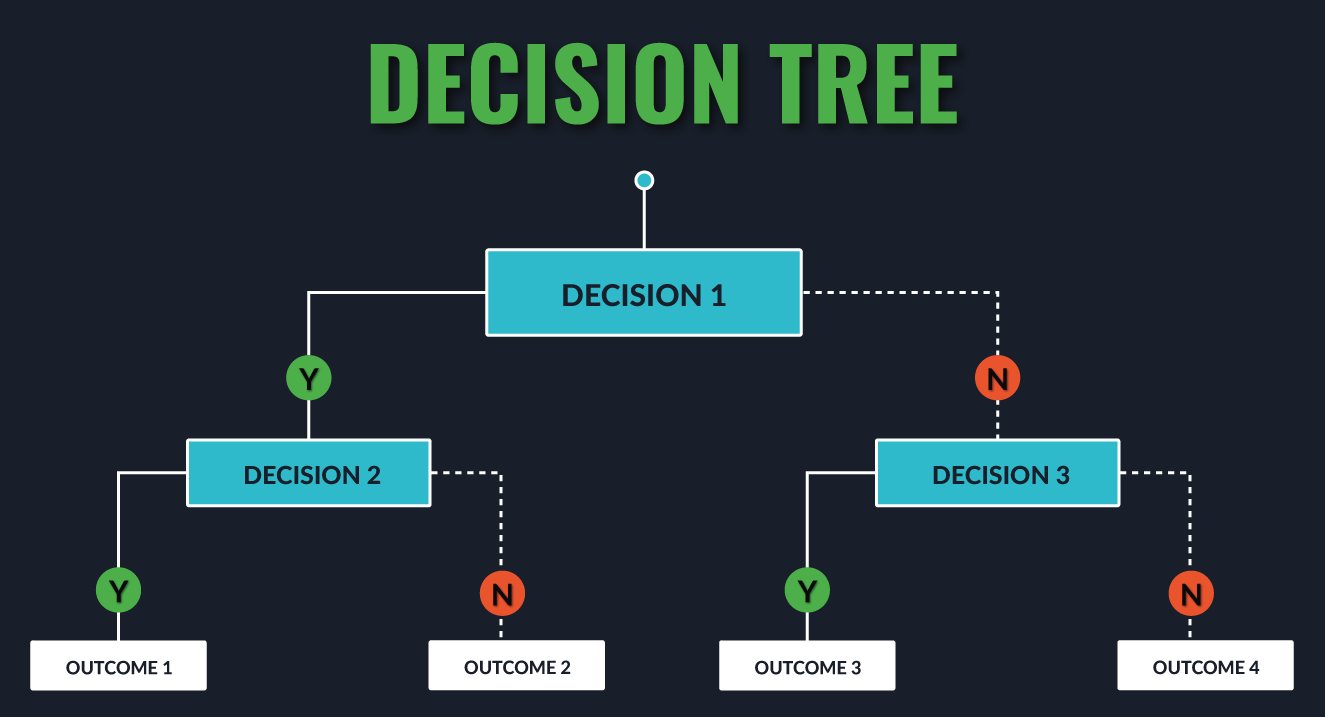

In [1]:
from IPython import display
display.Image("./decision-tree1.png")

Classification and Regression Trees (CART) can be translated into a graph or set of rules for predictive classification. They help when logistic regression models cannot provide sufficient decision boundaries to predict the label. In addition, decision tree models are more interpretable as they simulate the human decision-making process. In addition, CART models do not assume a linear relation.

**How do CART models work?**

Consider the case of two independent variables X1 and X2. We want to predict whether the outcome is red or blue. CART tries to split this data into subsets so that each subset is as pure or homogeneous as possible.

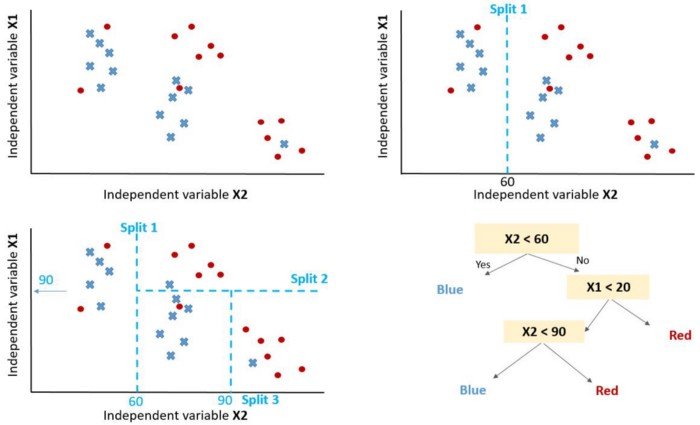

In [2]:
from IPython import display
display.Image("./cart.jpeg")

**How to control the model performance?**

After you select the variables to consider for the model through discipline knowledge or feature selection process you will need to define the optimum number of splits.
the target of splitting is to increase the homogeneity of the outcome from each node. Increase its ability to classify the data. In other words, increase the purity after each split. If we predict blue and red, choose the number of splits that give all blue and all red if possible. Choose the number of splits that will generate pure results.

To measure how the splits are behaving in terms of increasing information after the split we can rely on the following measures:

1-(p²+q²)
where p =P(Success) & q=P(Failure)

# Diagnosing Heart Disease

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting

### The Data

- age: The person's age in years
- sex: The person's sex (1 = male, 0 = female)
- cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
- chol: The person's cholesterol measurement in mg/dl
- fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
- restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- thalach: The person's maximum heart rate achieved
- exang: Exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
- slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- ca: The number of major vessels (0-3)
- thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- target: Heart disease (0 = no, 1 = yes)

In [18]:
df = pd.read_csv("heart.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


Let's change the column names to be a bit clearer:

In [19]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [20]:
df

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
df.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate_achieved      int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
target                       int64
dtype: object

Changing the values of the categorical variables, to improve the interpretation later on:

In [22]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'

/var/folders/m8/v8_kdm011wg6m28tjk9k1lww0000gn/T/ipykernel_39434/2982853875.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 0] = 'female'
/var/folders/m8/v8_kdm011wg6m28tjk9k1lww0000gn/T/ipykernel_39434/2982853875.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
/var/folders/m8/v8_kdm011wg6m28tjk9k1lww0000gn/T/ipykernel_39434/2982853875.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [23]:
df.dtypes


age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [56]:
df['sex'] = df['sex'].astype('object')
df['chest_pain_type'] = df['chest_pain_type'].astype('object')
df['fasting_blood_sugar'] = df['fasting_blood_sugar'].astype('object')
df['rest_ecg'] = df['rest_ecg'].astype('object')
df['exercise_induced_angina'] = df['exercise_induced_angina'].astype('object')
df['st_slope'] = df['st_slope'].astype('object')
df['thalassemia'] = df['thalassemia'].astype('object')

For the categorical varibles, we need to create dummy variables:

In [24]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


# Using train_test_split:

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10) #split the data

/var/folders/m8/v8_kdm011wg6m28tjk9k1lww0000gn/T/ipykernel_39434/661206351.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(df.drop('target', 1), df['target'], test_size = .2, random_state=10) #split the data


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dtree = DecisionTreeClassifier()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

## Prediction and Evaluation 

Let's evaluate our decision tree.

In [29]:
predictions = dtree.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix

In [31]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.71      0.75        35
           1       0.66      0.73      0.69        26

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.73      0.72      0.72        61



In [32]:
print(confusion_matrix(y_test,predictions))

[[25 10]
 [ 7 19]]


In [37]:
type(y_test)

pandas.core.series.Series

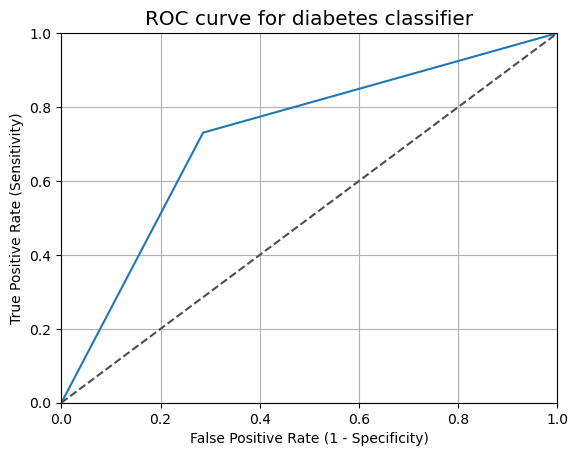

In [33]:
fpr, tpr, thresholds = roc_curve(y_test,predictions)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Another common metric is the Area Under the Curve, or AUC. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

**Let's see what the AUC gives us:**

In [34]:
auc(fpr, tpr)

0.7225274725274725

In [40]:
print(export_graphviz(decision_tree = dtree))

digraph Tree {
node [shape=box, fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[5] <= 0.5\ngini = 0.489\nsamples = 242\nvalue = [103, 139]"] ;
1 [label="X[16] <= 0.5\ngini = 0.344\nsamples = 145\nvalue = [32, 113]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="X[13] <= 0.5\ngini = 0.498\nsamples = 47\nvalue = [22, 25]"] ;
1 -> 2 ;
3 [label="X[0] <= 50.0\ngini = 0.366\nsamples = 29\nvalue = [7, 22]"] ;
2 -> 3 ;
4 [label="X[4] <= 0.9\ngini = 0.494\nsamples = 9\nvalue = [5, 4]"] ;
3 -> 4 ;
5 [label="X[12] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 2\nvalue = [2, 0]"] ;
5 -> 7 ;
8 [label="gini = 0.0\nsamples = 3\nvalue = [3, 0]"] ;
4 -> 8 ;
9 [label="X[1] <= 151.0\ngini = 0.18\nsamples = 20\nvalue = [2, 18]"] ;
3 -> 9 ;
10 [label="gini = 0.0\nsamples = 13\nvalue = [0, 13]"] ;
9 -> 10 ;
11 [label="X[0] <= 66.5\ngini = 0.408\nsample

# Random Forests

**Steps involved in random forest algorithm:**

Step 1: In Random forest n number of random records are taken from the data set having k number of records.

Step 2: Individual decision trees are constructed for each sample.

Step 3: Each decision tree will generate an output.

Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression respectively

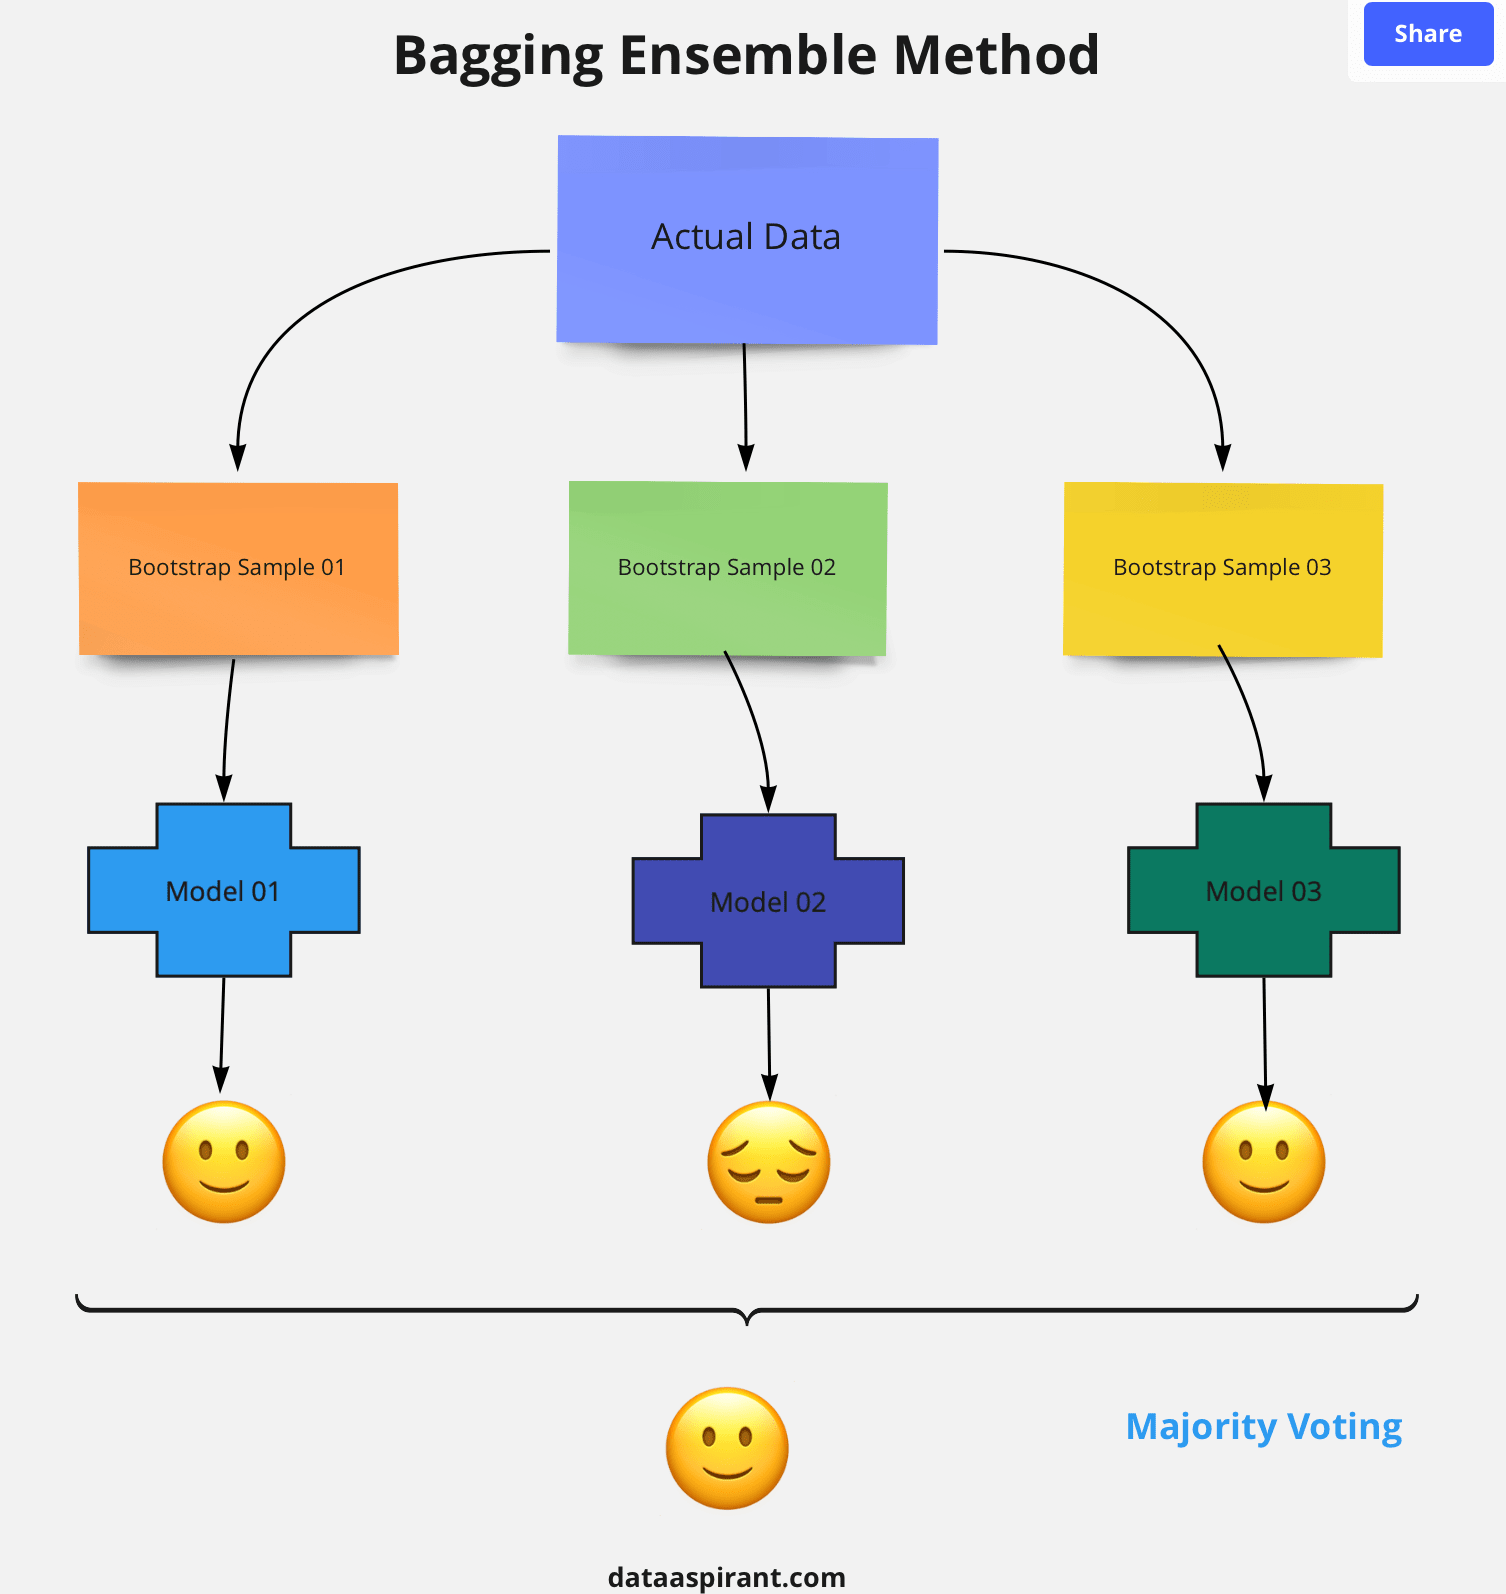

In [41]:
from IPython import display
display.Image("./Bagging-ensemble-method.png")

**Random Forests vs Decision Trees:**
- Random forests is a set of multiple decision trees.
- Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
- Decision trees are computationally faster.
- Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.

## Random Forests

Now let's compare the decision tree model to a random forest.

In [42]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
rfc_pred = rfc.predict(X_test)

In [44]:
rfc_pred_quant = model.predict_proba(X_test)[:, 1]
rfc_pred_bin = model.predict(X_test)

NameError: name 'model' is not defined

In [100]:
print(confusion_matrix(y_test,rfc_pred_bin))

[[28  7]
 [ 4 22]]


In [101]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82        35
           1       0.75      0.81      0.78        26

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



**That seems reasonable. Let's also check with a Receiver Operator Curve (ROC):**

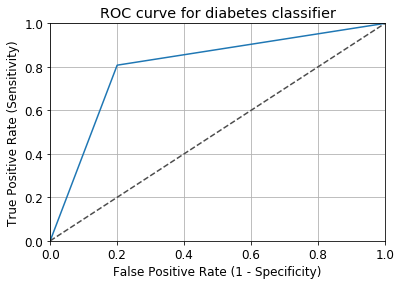

In [102]:


fpr, tpr, thresholds = roc_curve(y_test, rfc_pred)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

**Let's see what the AUC gives us:**

In [103]:
auc(fpr, tpr)

0.803846153846154

# Exercise

In [108]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [114]:
#Loading datasets 

iris_data = load_iris() 

iris=pd.DataFrame(iris_data.data)

#priting features name of iris data 

print ("Features Name : ", iris_data.feature_names) 

#shape of datasets 

print ("Dataset Shape: ", iris.shape) 

#first five sample 

print ("Dataset: ",iris.head())  

Features Name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Dataset Shape:  (150, 4)
Dataset:       0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2


Here we are loading iris flower datasets using sklearn library. In the output we can see that the shape of data is (150, 4) which means we have 150 samples (rows) and 4 features (columns).

4 features are : sepal length , sepal width, petal length , petal width. The features have some values (150 sample) based on that flowers classified in three category that is setosa ,versicolor and virginica (0,1 and 2).

On the basis of features () we will decide which flower belongs to which category by training the model with the datasets that we have.

In [116]:
#priting samples and target 

X = iris.values[:, 0:4] 

Y = iris_data.target

print(X)

print(Y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

The output that categories are (0,1 and 2,  setosa ,versicolor and virginica) and there are four features, whose values ​​are changing when the category of the flowers is changing.

### Import Library for splitting data

In [117]:
from sklearn.model_selection import train_test_split

### Creating Train and Test datasets

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 50, test_size = 0.25)

### Creating Decision Tree Classifier and fit the model

In [154]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Prediction on X_test (testing data )

In [156]:
y_pred=clf.predict(X_test)

### Print Confusion_Matrix

In [157]:
print(confusion_matrix(y_test,y_pred))

[[11  0  0]
 [ 0 14  1]
 [ 0  1 11]]


### Print Classification Report

In [158]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



### Predict Accuracy Score

In [148]:
y_pred = clf.predict(X_test)
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=clf.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred=y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.9473684210526315


# Random Forest Classifier

### Creating Random Forest Classifier and fit the model

In [159]:
rfciris = RandomForestClassifier(n_estimators=100)
rfciris.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Prediction on X_test (testing data )

In [160]:
rfciris_pred = rfciris.predict(X_test)

### Print Confusion_Matrix

In [161]:
print(confusion_matrix(y_test,rfciris_pred))

[[11  0  0]
 [ 0 14  1]
 [ 0  1 11]]


### Print Classification Report

In [163]:
print(classification_report(y_test,rfciris_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      0.93      0.93        15
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

